In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# exploring data

In [156]:
df = pd.read_csv('mymoviedb.csv')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,12/15/2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,3/1/2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2/25/2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,11/24/2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,12/22/2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [158]:
df.shape

(9837, 9)

In [159]:
df.nunique()

Release_Date         5903
Title                9514
Overview             9823
Popularity           8160
Vote_Count           3267
Vote_Average           75
Original_Language      44
Genre                2337
Poster_Url           9826
dtype: int64

-Date release column type needs to be changed   
-Also vote counts and vote average

# cleaning data

In [160]:
#checking for duplicates
df.duplicated().sum()

0

In [161]:
#checking for null values
df.isnull().sum()

Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64

In [162]:
#dropping null values
df= df.dropna()
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [163]:
#changing data type of release_date column to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors ='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9826 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9826 non-null   datetime64[ns]
 1   Title              9826 non-null   object        
 2   Overview           9826 non-null   object        
 3   Popularity         9826 non-null   float64       
 4   Vote_Count         9826 non-null   object        
 5   Vote_Average       9826 non-null   object        
 6   Original_Language  9826 non-null   object        
 7   Genre              9826 non-null   object        
 8   Poster_Url         9826 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 767.7+ KB


In [164]:
#create new column for year
df['Year'] = df['Release_Date'].dt.year

In [165]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021


In [166]:
#changing data type for vote agerage column and vote counts
df['Vote_Average']= df['Vote_Average'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9826 entries, 0 to 9836
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9826 non-null   datetime64[ns]
 1   Title              9826 non-null   object        
 2   Overview           9826 non-null   object        
 3   Popularity         9826 non-null   float64       
 4   Vote_Count         9826 non-null   object        
 5   Vote_Average       9826 non-null   float64       
 6   Original_Language  9826 non-null   object        
 7   Genre              9826 non-null   object        
 8   Poster_Url         9826 non-null   object        
 9   Year               9826 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 844.4+ KB


In [167]:
df['Vote_Count']= df['Vote_Count'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9826 entries, 0 to 9836
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9826 non-null   datetime64[ns]
 1   Title              9826 non-null   object        
 2   Overview           9826 non-null   object        
 3   Popularity         9826 non-null   float64       
 4   Vote_Count         9826 non-null   int32         
 5   Vote_Average       9826 non-null   float64       
 6   Original_Language  9826 non-null   object        
 7   Genre              9826 non-null   object        
 8   Poster_Url         9826 non-null   object        
 9   Year               9826 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(5)
memory usage: 806.0+ KB


In [168]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021


In [169]:
df.describe()

,Popularity,Vote_Count,Vote_Average,Year
count,9826.000000,9826.000000,9826.000000,9826.000000
mean,40.323951,1392.943721,6.439467,2006.202931
std,108.879332,2611.303856,1.129797,15.686202
min,13.354000,0.000000,0.000000,1902.000000
25%,16.128250,146.000000,5.900000,2000.000000
50%,21.195000,444.000000,6.500000,2011.000000
75%,35.179250,1376.000000,7.100000,2017.000000
max,5083.954000,31077.000000,10.000000,2024.000000


In [170]:
#exploring geners
df.Genre.value_counts()

Drama                                            466
Comedy                                           403
Drama, Romance                                   248
Horror                                           238
Horror, Thriller                                 199
                                                ... 
Drama, Horror, Thriller, Science Fiction           1
Action, Science Fiction, Animation, Adventure      1
Comedy, Fantasy, Horror, Science Fiction           1
Drama, Science Fiction, Animation                  1
War, Drama, Science Fiction                        1
Name: Genre, Length: 2337, dtype: int64

# visualization

What is the most populer genre?

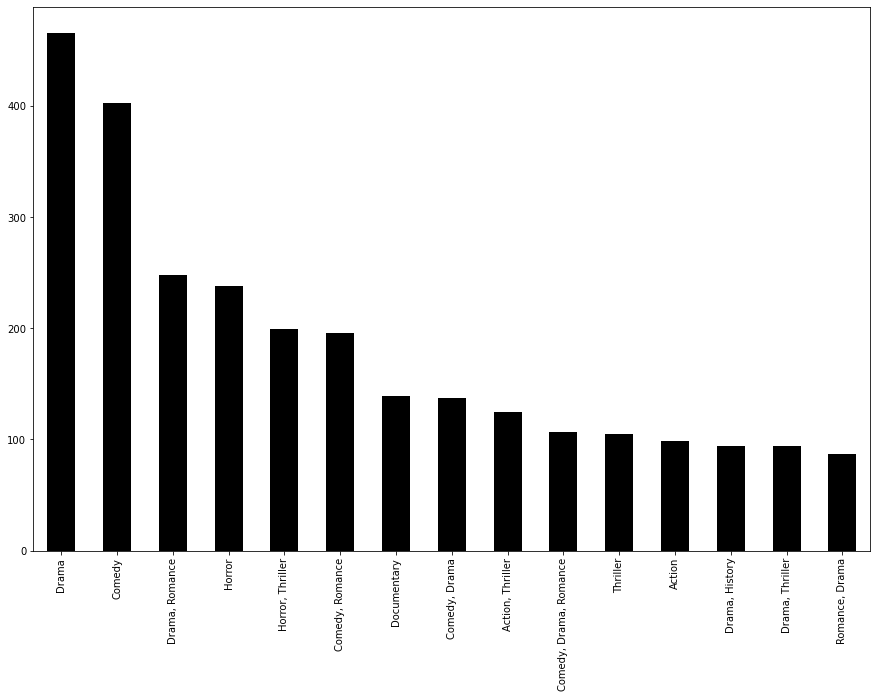

In [171]:
#most genre
df['Genre'].value_counts().head(15).plot.bar(figsize=(15,10), color='black')
plt.show()

What is the most frequent year?

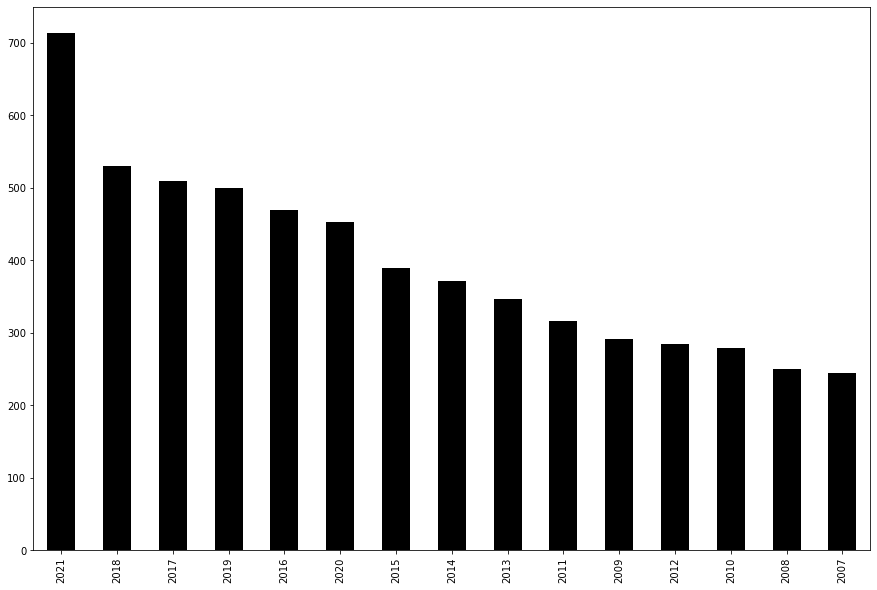

In [172]:
#most year
df['Year'].value_counts().head(15).plot.bar(figsize=(15,10), color='black')
plt.show()

In [ ]:
(
    ggplot(hotels_europe_cut, aes(x="price", y="stat(density)", color="city"))
    + geom_line(stat="density", show_legend="False")
    + labs(x="Price (US dollars)", y="Density", color="")
    + scale_color_manual(
        name="", values=[color[1], color[0]], labels=["London", "Vienna"]
    )
    + scale_y_continuous(limits=[0, 0.015], breaks=seq(0, 0.015, 0.003))
    + scale_x_continuous(expand=[0.0, 0.0], limits=[0, 500], breaks=seq(0, 500, 100))
    + geom_text(aes(x=340, y=0.003, label=["London"]), color=color[1], size=10)
    + geom_text(aes(x=200, y=0.007, label=["Vienna"]), color=color[0], size=10)
    + theme_bw()
)